# Algoritmos de Inteligência Artificial Bioinspirados - Algoritmos genéticos

# Representação do problema - calendários de voos

In [1]:
# Libraries
import time
import sys
import random
import matplotlib.pyplot as plt

#### Define name and abreviattion from countries

In [2]:
pessoas = [('Lisbon', 'LIS'),
           ('Madrid', 'MAD'),
           ('Paris', 'CDG'),
           ('Dublin', 'DUB'),
           ('Brussels', 'BRU'),
           ('London', 'LHR')]

- Tests

In [3]:
pessoas[3] #tuplas

('Dublin', 'DUB')

- Our destiny is find the best way, with smaller cost and time

In [4]:
destino = 'FCO' # Roma is destiny

In [5]:
voos = {('BRU', 'FCO'): ['15:44', '18:55', 382]} #tests
voos

{('BRU', 'FCO'): ['15:44', '18:55', 382]}

- Recovery in archive (flights.txt) data from flights

In [6]:
voos = {}
for linha in open('flights.txt'): #open archive
    #print(linha.split(','))
    origem, destino, partida, chegada, preco = linha.split(',') # four variables
    voos.setdefault((origem, destino), [])
    voos[(origem, destino)].append((partida, chegada, int(preco)))

In [7]:
voos #visualize

{('FCO', 'LIS'): [('6:19', '8:13', 239),
  ('8:04', '10:59', 136),
  ('9:31', '11:43', 210),
  ('11:07', '13:24', 171),
  ('12:31', '14:02', 234),
  ('14:05', '15:47', 226),
  ('15:07', '17:21', 129),
  ('16:35', '18:56', 144),
  ('18:25', '20:34', 205),
  ('20:05', '21:44', 172)],
 ('LIS', 'FCO'): [('6:11', '8:31', 249),
  ('7:39', '10:24', 219),
  ('9:15', '12:03', 99),
  ('11:08', '13:07', 175),
  ('12:18', '14:56', 172),
  ('13:37', '15:08', 250),
  ('15:03', '16:42', 135),
  ('16:51', '19:09', 147),
  ('18:12', '20:17', 242),
  ('20:05', '22:06', 261)],
 ('FCO', 'MAD'): [('6:03', '8:43', 219),
  ('7:50', '10:08', 164),
  ('9:11', '10:42', 172),
  ('10:33', '13:11', 132),
  ('12:08', '14:47', 231),
  ('14:19', '17:09', 190),
  ('15:04', '17:23', 189),
  ('17:06', '20:00', 95),
  ('18:33', '20:22', 143),
  ('19:32', '21:25', 160)],
 ('MAD', 'FCO'): [('6:05', '8:32', 174),
  ('8:25', '10:34', 157),
  ('9:42', '11:32', 169),
  ('11:01', '12:39', 260),
  ('12:44', '14:17', 134),
  ('14

In [8]:
voos[('FCO', 'LIS')] # tests with abreviattions

[('6:19', '8:13', 239),
 ('8:04', '10:59', 136),
 ('9:31', '11:43', 210),
 ('11:07', '13:24', 171),
 ('12:31', '14:02', 234),
 ('14:05', '15:47', 226),
 ('15:07', '17:21', 129),
 ('16:35', '18:56', 144),
 ('18:25', '20:34', 205),
 ('20:05', '21:44', 172)]

In [9]:
#[1,4, 3,2, 7,3, 6,3, 2,4, 5,3]

---------

##### First funciton = show_calendar(), your hiperparams are: only calendar.
- receive a list of numbers calling (calendar) and return a print of list of fligts with each hour and each country.
- Examples: calendar = [1,4, 3,2, 7,3, 6,3, 2,4, 5,3]
- index 0 = 1 i.e. flight 1 (going)
- index 1 = 4 i.e. flight 2 (return)

and like this in next

In [11]:
# funct calendar
def imprime_calendario(calendario):
    voo_id = -1
    preco_total = 0
    
    for i in range(len(calendario) // 2):
        nome = pessoas[i][0]
        #print(nome)
        
        origem = pessoas[i][1]
        #print(origem)
        
        voo_id += 1
        
        voo_ida = voos[(origem, destino)][calendario[voo_id]]
        #print(voo_ida)
        
        preco_total += voo_ida[2]
        
        voo_id += 1
        
        voo_volta = voos[(destino, origem)][calendario[voo_id]]
        #print(voo_volta)
        
        preco_total += voo_volta[2]
        
        print('%10s%10s %5s-%5s U$%3s %5s-%5s U$%3s' % (nome, origem, voo_ida[0], voo_ida[1], voo_ida[2], 
                                                    voo_volta[0], voo_volta[1], voo_volta[2]))
    print('Preço total: ', preco_total)

##### Next function = get_minuts(), transform hour in minutes
- Use time

In [12]:
def get_minutos(hora):
    t = time.strptime(hora, '%H:%M')
    return t[3] * 60 + t[4]

In [13]:
get_minutos('7:39'), get_minutos('7:50') #test

(459, 470)

##### Funcao_avaliacao() = fitness(), in this function inputs calendar and calculus of cost of price and cost of wait for each people
- calendar = vector
- return total_price plus total_wait

In [14]:
def funcao_avaliacao(calendario):
    preco_total = 0
    ultima_chegada = 0 
    primeira_partida = 1439
    
    voo_id = -1
    
    for i in range(len(calendario) // 2):
        origem = pessoas[i][1]

        voo_id += 1
        voo_ida = voos[(origem, destino)][calendario[voo_id]]
        voo_id +=1
        voo_volta = voos[(destino, origem)][calendario[voo_id]]

        preco_total += voo_ida[2]
        preco_total += voo_volta[2]
        
        if ultima_chegada < get_minutos(voo_ida[1]):
            ultima_chegada = get_minutos(voo_ida[1])
        
        if primeira_partida > get_minutos(voo_volta[0]):
            primeira_partida = get_minutos(voo_volta[0])
            
    #print(ultima_chegada)
    #print(primeira_partida)
    #print(preco_total)
    
    espera_total = 0
    voo_id =-1

    for i in range(len(calendario) // 2):
        origem = pessoas[i][1]
        
        voo_id += 1
        voo_ida = voos[(origem, destino)][calendario[voo_id]]
        
        voo_id += 1
        voo_volta = voos[(destino, origem)][calendario[voo_id]]
        
        espera_total += ultima_chegada - get_minutos(voo_ida[1])
        espera_total += get_minutos(voo_volta[0]) - primeira_partida
        
    return espera_total + preco_total

In [15]:
# Tes with 1º function
imprime_calendario([1,4, 3,2, 7,3, 6,3, 2,4, 5,3])

    Lisbon       LIS  7:39-10:24 U$219 12:31-14:02 U$234
    Madrid       MAD 11:01-12:39 U$260  9:11-10:42 U$172
     Paris       CDG 17:07-20:04 U$291 11:08-14:38 U$262
    Dublin       DUB 15:27-17:18 U$151 10:33-12:03 U$ 74
  Brussels       BRU  9:08-12:12 U$364 12:20-16:34 U$500
    London       LHR 13:40-15:38 U$137 10:32-13:16 U$139
Preço total:  2803


In [16]:
# test fitness
funcao_avaliacao([1,4, 3,1, 8,3, 6,3, 2,4, 5,3])

6096

In [17]:
# test with function
get_minutos('20:04'), get_minutos('9:11')

(1204, 551)

In [18]:
# domin is a base for our calculus, for each flights
dominio = [(0, 9)] * (len(pessoas) * 2)
dominio, len(dominio)

([(0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9)],
 12)

##### A famous function from genetic algorithm mutation
- receive domin, passo = size of mutation, calendario = calendar, probabilidade_mutacao = proba_mutation
- in this function, lets receive calendar and tranform in mutate if condition for true.
- For this condiction, we have, random.random(), that to calculate a random number between 0, 1, type float
- If this condiction is true, calender receive a mutation, with value of passo

In [19]:
def mutacao(dominio, passo, calendario, probabilidade_mutacao):
    gene = random.randint(0, len(dominio) - 1)
    #print(gene)
    mutante = calendario
    if random.random() < probabilidade_mutacao: #prob
        if calendario[gene] != dominio[gene][0]:
            mutante = calendario[0:gene] + [calendario[gene] - passo] + calendario[gene + 1:]
            #print(mutante)
        else:
            if calendario[gene] != dominio[gene][1]:
                mutante = calendario[0:gene] + [calendario[gene] + passo] + calendario[gene + 1:]
    return mutante

In [20]:
#Test
mutacao(dominio, 1, [1,4, 3,2, 7,3, 6,3, 2,4, 5,3], 0.05)

[1, 4, 3, 2, 7, 3, 6, 3, 2, 4, 5, 3]

##### Crossover function from GA
- receive a two individues and domin
- return one individuo mutate

In [21]:
def crossover(dominio, individuo1, individuo2):
    gene = random.randint(1, len(dominio) - 2)
    #print(gene)
    return individuo1[0:gene] + individuo2[gene:]

In [22]:
#test with function
s1 = [1,4, 3,2, 7,3, 6,3, 2,4, 5,3]
s2 = [0,1, 2,5, 8,9, 2,3, 5,1, 0,6]
crossover(dominio, s1, s2)

[1, 4, 3, 2, 8, 9, 2, 3, 5, 1, 0, 6]

- Start function, the principal function

In [29]:
def algoritmo_genetico(dominio, funcao_avaliacao, tamanho_populacao = 100, passo = 1,
                       elitismo = 0.2, numero_geracoes = 500, probabilidade_mutacao = 0.05):
    populacao = [] #initialize population
    evolucao = [] # initialize evolution of cost
    
    for i in range(tamanho_populacao): # call random_population function for each tam_pop
        individuo = [random.randint(dominio[i][0], dominio[i][1]) for i in range(len(dominio))]
        populacao.append(individuo)
    #print(len(populacao))
    numero_elitismo = int(elitismo * tamanho_populacao) # tranform n_elitism in number int for receive correct numbers
    #print(numero_elitismo)
    #print('Tamanho da população: ', len(populacao))
    
    #initialize generations
    for i in range(numero_geracoes):
        custos = [(funcao_avaliacao(individuo), individuo) for individuo in populacao]
        evolucao.append(custos[0][0])
        #print(evolucao)
        #print(custos)
        custos.sort()
        #print(custos)
        individuos_ordenados = [individuo for (custo, individuo) in custos]
        #print(individuos_ordenados)
        populacao = individuos_ordenados[0:numero_elitismo] # 0:2
        #print(populacao
    
        #print('Tamanho da população: ', len(populacao))
    
        # initialize process of mutation and crossover
        while len(populacao) < tamanho_populacao:
            i1 = random.randint(0, numero_elitismo)
            i2 = random.randint(0, numero_elitismo)
            #print(i1, i2, individuos_ordenados[i1], individuos_ordenados[i2])
            novo_individuo = crossover(dominio, individuos_ordenados[i1], individuos_ordenados[i2])
            #print(novo_individuo)
            mutacao_novo_individuo = mutacao(dominio, passo, novo_individuo, probabilidade_mutacao)
            #print(novo_individuo)
            #print(mutacao_novo_individuo)
            #print()
            populacao.append(mutacao_novo_individuo)

        #print('Tamanho da população: ', len(populacao))
        #print(custos)
        print(f'Generation: {i+1} / {numero_geracoes}')
        
    # in the end plot evolution
    plt.plot(evolucao)
    plt.title('Evolution')
    plt.xlabel('Generations')
    plt.ylabel('Cost')
    plt.savefig('resultado.png')
    #print(evolucao)
    return custos[0][1]

Generation: 1 / 150
Generation: 2 / 150
Generation: 3 / 150
Generation: 4 / 150
Generation: 5 / 150
Generation: 6 / 150
Generation: 7 / 150
Generation: 8 / 150
Generation: 9 / 150
Generation: 10 / 150
Generation: 11 / 150
Generation: 12 / 150
Generation: 13 / 150
Generation: 14 / 150
Generation: 15 / 150
Generation: 16 / 150
Generation: 17 / 150
Generation: 18 / 150
Generation: 19 / 150
Generation: 20 / 150
Generation: 21 / 150
Generation: 22 / 150
Generation: 23 / 150
Generation: 24 / 150
Generation: 25 / 150
Generation: 26 / 150
Generation: 27 / 150
Generation: 28 / 150
Generation: 29 / 150
Generation: 30 / 150
Generation: 31 / 150
Generation: 32 / 150
Generation: 33 / 150
Generation: 34 / 150
Generation: 35 / 150
Generation: 36 / 150
Generation: 37 / 150
Generation: 38 / 150
Generation: 39 / 150
Generation: 40 / 150
Generation: 41 / 150
Generation: 42 / 150
Generation: 43 / 150
Generation: 44 / 150
Generation: 45 / 150
Generation: 46 / 150
Generation: 47 / 150
Generation: 48 / 150
G

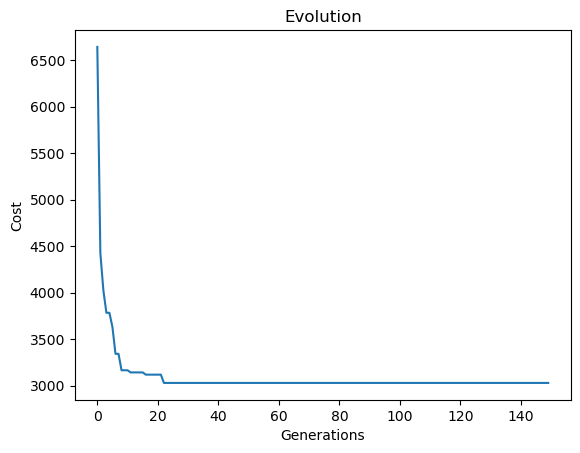

In [33]:
#test
solucao = algoritmo_genetico(dominio, funcao_avaliacao,
                             elitismo=0.2,
                             tamanho_populacao=100,
                             numero_geracoes=150, 
                             probabilidade_mutacao=0.05)

In [34]:
#Print calender with the best soluction
print('Solução:', solucao)
print('Custo total: ', funcao_avaliacao(solucao))
imprime_calendario(solucao)

Solução: [6, 2, 5, 3, 5, 2, 6, 3, 3, 2, 5, 5]
Custo total:  3030
    Lisbon       LIS 15:03-16:42 U$135  9:31-11:43 U$210
    Madrid       MAD 14:22-16:32 U$126 10:33-13:11 U$132
     Paris       CDG 14:01-17:24 U$338  9:25-12:46 U$295
    Dublin       DUB 15:27-17:18 U$151 10:33-12:03 U$ 74
  Brussels       BRU 10:30-14:57 U$290  9:49-13:51 U$229
    London       LHR 13:40-15:38 U$137 13:37-15:33 U$142
Preço total:  2259
